## Image Classification 

**Dataset**
 - Kaggle Dogs vs Cats 

**Developing Neural Network using Keras API**

- Initial implementation is a feed-forward NN; in progress is CNN for image classification

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import argparse
import cv2
import os

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [137]:
def convert_image_to_vector(image,size=(32,32)):
    
    """
    Resizes the image to fixed size and flattens image into a 
    list of raw pixel intensities
    """
    
    vect = cv2.resize(image,size).flatten()
    return(vect)

def label_encoder(labels):
    
    """ Encode the labels from Str to Int """
    
    encode = LabelEncoder().fit_transform(labels)
    l = pd.DataFrame(encode)
    return(np_utils.to_categorical(l, 2))

def Scale_Input(data):
    
    """Scale the input image pixels to the range 0 and 1 """
    
    return(np.array(data) / 255.0)


def preprocess_data(main_dir = 'CatDog_Images',source='Train_Set'):
    
    """ Preprocessing Input image Data"""
    
    file_dir = '{}/data/{}/{}'.format(os.getcwd(),main_dir,source)
    files = os.listdir(file_dir)

    data = []
    labels = []

    for i,fig in enumerate(files):
        labels.append(fig.split('.')[0])
        image = cv2.imread('{}/{}'.format(file_dir,fig))
        features = convert_image_to_vector(image)
        data.append(features)
        
    #Modify Labels where '0' is in label names
    labels_mod= ['cat' if '0' in i else i for i in labels]
        

    labels_mod = label_encoder(labels_mod)
    data_scale = Scale_Input(data)
    return(data_scale,labels_mod)

In [138]:
def test_train_split(data,labels,test_split=0.25):
    
    """ Split Images up into 75% Training and 25% testing"""
    
    trainData, testData, trainLabels, testLabels = train_test_split(data, labels, test_size=test_split, random_state=42)
    
    return(trainData, testData, trainLabels, testLabels)

In [175]:
def feedforward_neural_net(data,labels,learning_rate = 0.01,epoch=10,input_dim = 3072):
    
    """ Set up Neural Network Configuration using Keras

    Nerual Network Structure
    input_dim -- input dimensions of NN -- size x size x RGB (i.e. 32x32x3)
    Two hidden layers with 768 and 384 nodes respectively
    Output Node = 2 (i.e. Cat or Dog)
    """
    
    trainData, testData, trainLabels, testLabels = test_train_split(data,labels)

    model = Sequential()
    #First Layer
    model.add(Dense(768, input_dim=3072, init="uniform",activation="relu"))
    #Second Layer
    model.add(Dense(384, init="uniform", activation="relu"))
    #Output Layer
    model.add(Dense(2))
    #Output Class Label Probabilities
    model.add(Activation("softmax"))
    
    #Stochastic Gradient Descent
    sgd = SGD(lr=learning_rate)
    
    #Two class labels -- use binary_crossentropy
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
     
        
    #Epoch: each individual training example n times in an attempt to learn pattern
    hist = model.fit(trainData, trainLabels, nb_epoch=epoch, batch_size=128)
    
    print("Evaluating Neural Network on Testing Set...")
    loss, accuracy = model.evaluate(testData, testLabels,batch_size=128, verbose=1)
    print("Loss={:.4f}, Accuracy: {:.4f}%".format(loss,accuracy * 100))
    
    return(hist)

In [176]:
if __name__ == '__main__':

    #comment out once data/labels are computed
    #data,labels = preprocess_data()
    
    hist = feedforward_neural_net(data,labels)

Epoch 1/10
18750/18750 [==============================] - 4s - loss: 0.6838 - acc: 0.5581     
Epoch 2/10
18750/18750 [==============================] - 4s - loss: 0.6635 - acc: 0.5969     
Epoch 3/10
18750/18750 [==============================] - 4s - loss: 0.6523 - acc: 0.6148     
Epoch 4/10
18750/18750 [==============================] - 4s - loss: 0.6466 - acc: 0.6254     - ETA: 1s - loss: 0.645
Epoch 5/10
18750/18750 [==============================] - 4s - loss: 0.6412 - acc: 0.6312     
Epoch 6/10
18750/18750 [==============================] - 4s - loss: 0.6340 - acc: 0.6386     
Epoch 7/10
18750/18750 [==============================] - 4s - loss: 0.6277 - acc: 0.6465     
Epoch 8/10
18750/18750 [==============================] - 4s - loss: 0.6233 - acc: 0.6542     
Epoch 9/10
18750/18750 [==============================] - 4s - loss: 0.6232 - acc: 0.6481     
Epoch 10/10
18750/18750 [==============================] - 4s - loss: 0.6148 - acc: 0.6578     
Evaluating Neural Network 

### Visualization of Model

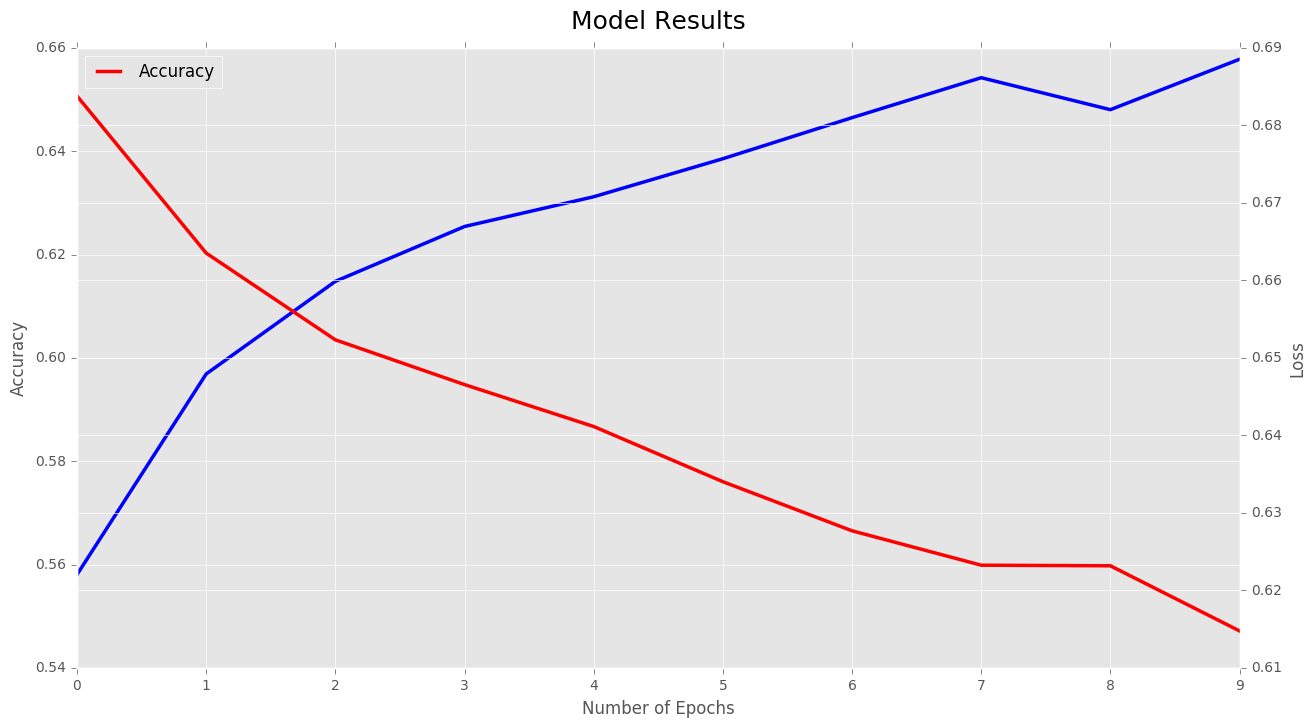

In [204]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.plot(hist.history['acc'],lw=2.5,color='blue')
ax2.plot(hist.history['loss'],lw=2.5,color='red')
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax.set_xlabel('Number of Epochs')
plt.title('Model Results',y=1.02,fontsize=18)
plt.legend(['Accuracy'], loc='upper left')

### Grid Search 

- Using Keras and Sklearn API to develop Neural Network and tune Hyperparameters

In [205]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense
from keras.utils import np_utils
from imutils import paths
import numpy as np
import pandas as pd

**Tuning Batch Size and Epochs**

Batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated.
The number of epochs is the number of times that the entire training dataset is shown to the network during training.

In [242]:
from sklearn.datasets import load_diabetes

In [246]:
feat = pd.DataFrame(load_diabetes().data)
target = pd.DataFrame(load_diabetes().target,columns=['Target'])

In [249]:
data = pd.concat([feat,target],axis=1)
#Split Data into Training/Testing
X = data.ix[:,:-1].values
Y = data.ix[:,'Target'].values

In [207]:
from keras.wrappers.scikit_learn import BaseWrapper
import copy

def custom_get_params(self, **params):
    res = copy.deepcopy(self.sk_params)
    res.update({'build_fn': self.build_fn})
    return res

BaseWrapper.get_params = custom_get_params

In [274]:
def build_model():
    model = Sequential()
    model.add(Dense(12,input_dim=10,activation='relu'))
    #Output Layer
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    return(model)

In [275]:
model = KerasClassifier(build_fn=build_model,verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X,Y)

In [283]:
grid_result.score

<bound method BaseSearchCV.score of GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x150149be0>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'batch_size': [10, 20, 40, 60, 80, 100], 'nb_epoch': [50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [284]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.000000 using {'batch_size': 10, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 10, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 10, 'nb_epoch': 100}
0.000000 (0.000000) with: {'batch_size': 20, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 20, 'nb_epoch': 100}
0.000000 (0.000000) with: {'batch_size': 40, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 40, 'nb_epoch': 100}
0.000000 (0.000000) with: {'batch_size': 60, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 60, 'nb_epoch': 100}
0.000000 (0.000000) with: {'batch_size': 80, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 80, 'nb_epoch': 100}
0.000000 (0.000000) with: {'batch_size': 100, 'nb_epoch': 50}
0.000000 (0.000000) with: {'batch_size': 100, 'nb_epoch': 100}
